# WINE QUALITY PREDUCTION USING ANN

### Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

### Fetching data from csv file

In [2]:
data = pd.read_csv("Wine_Quality_Data.csv")
data.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [3]:
c = {"red":0,"white":1}

In [4]:
data["color"] = data["color"].map(c)

In [5]:
data.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


Data visualization

<AxesSubplot:>

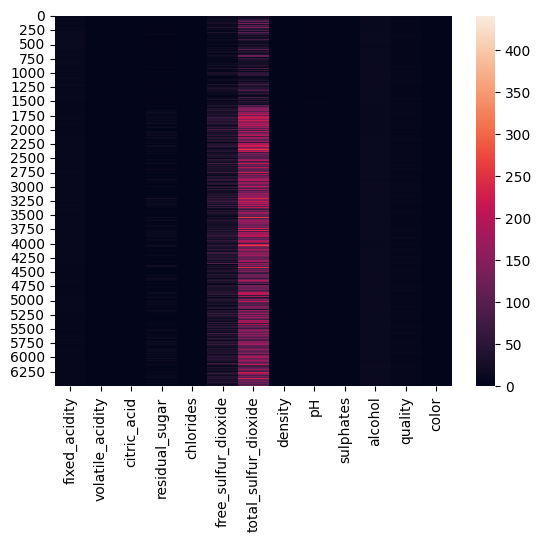

In [6]:
sns.heatmap(data)

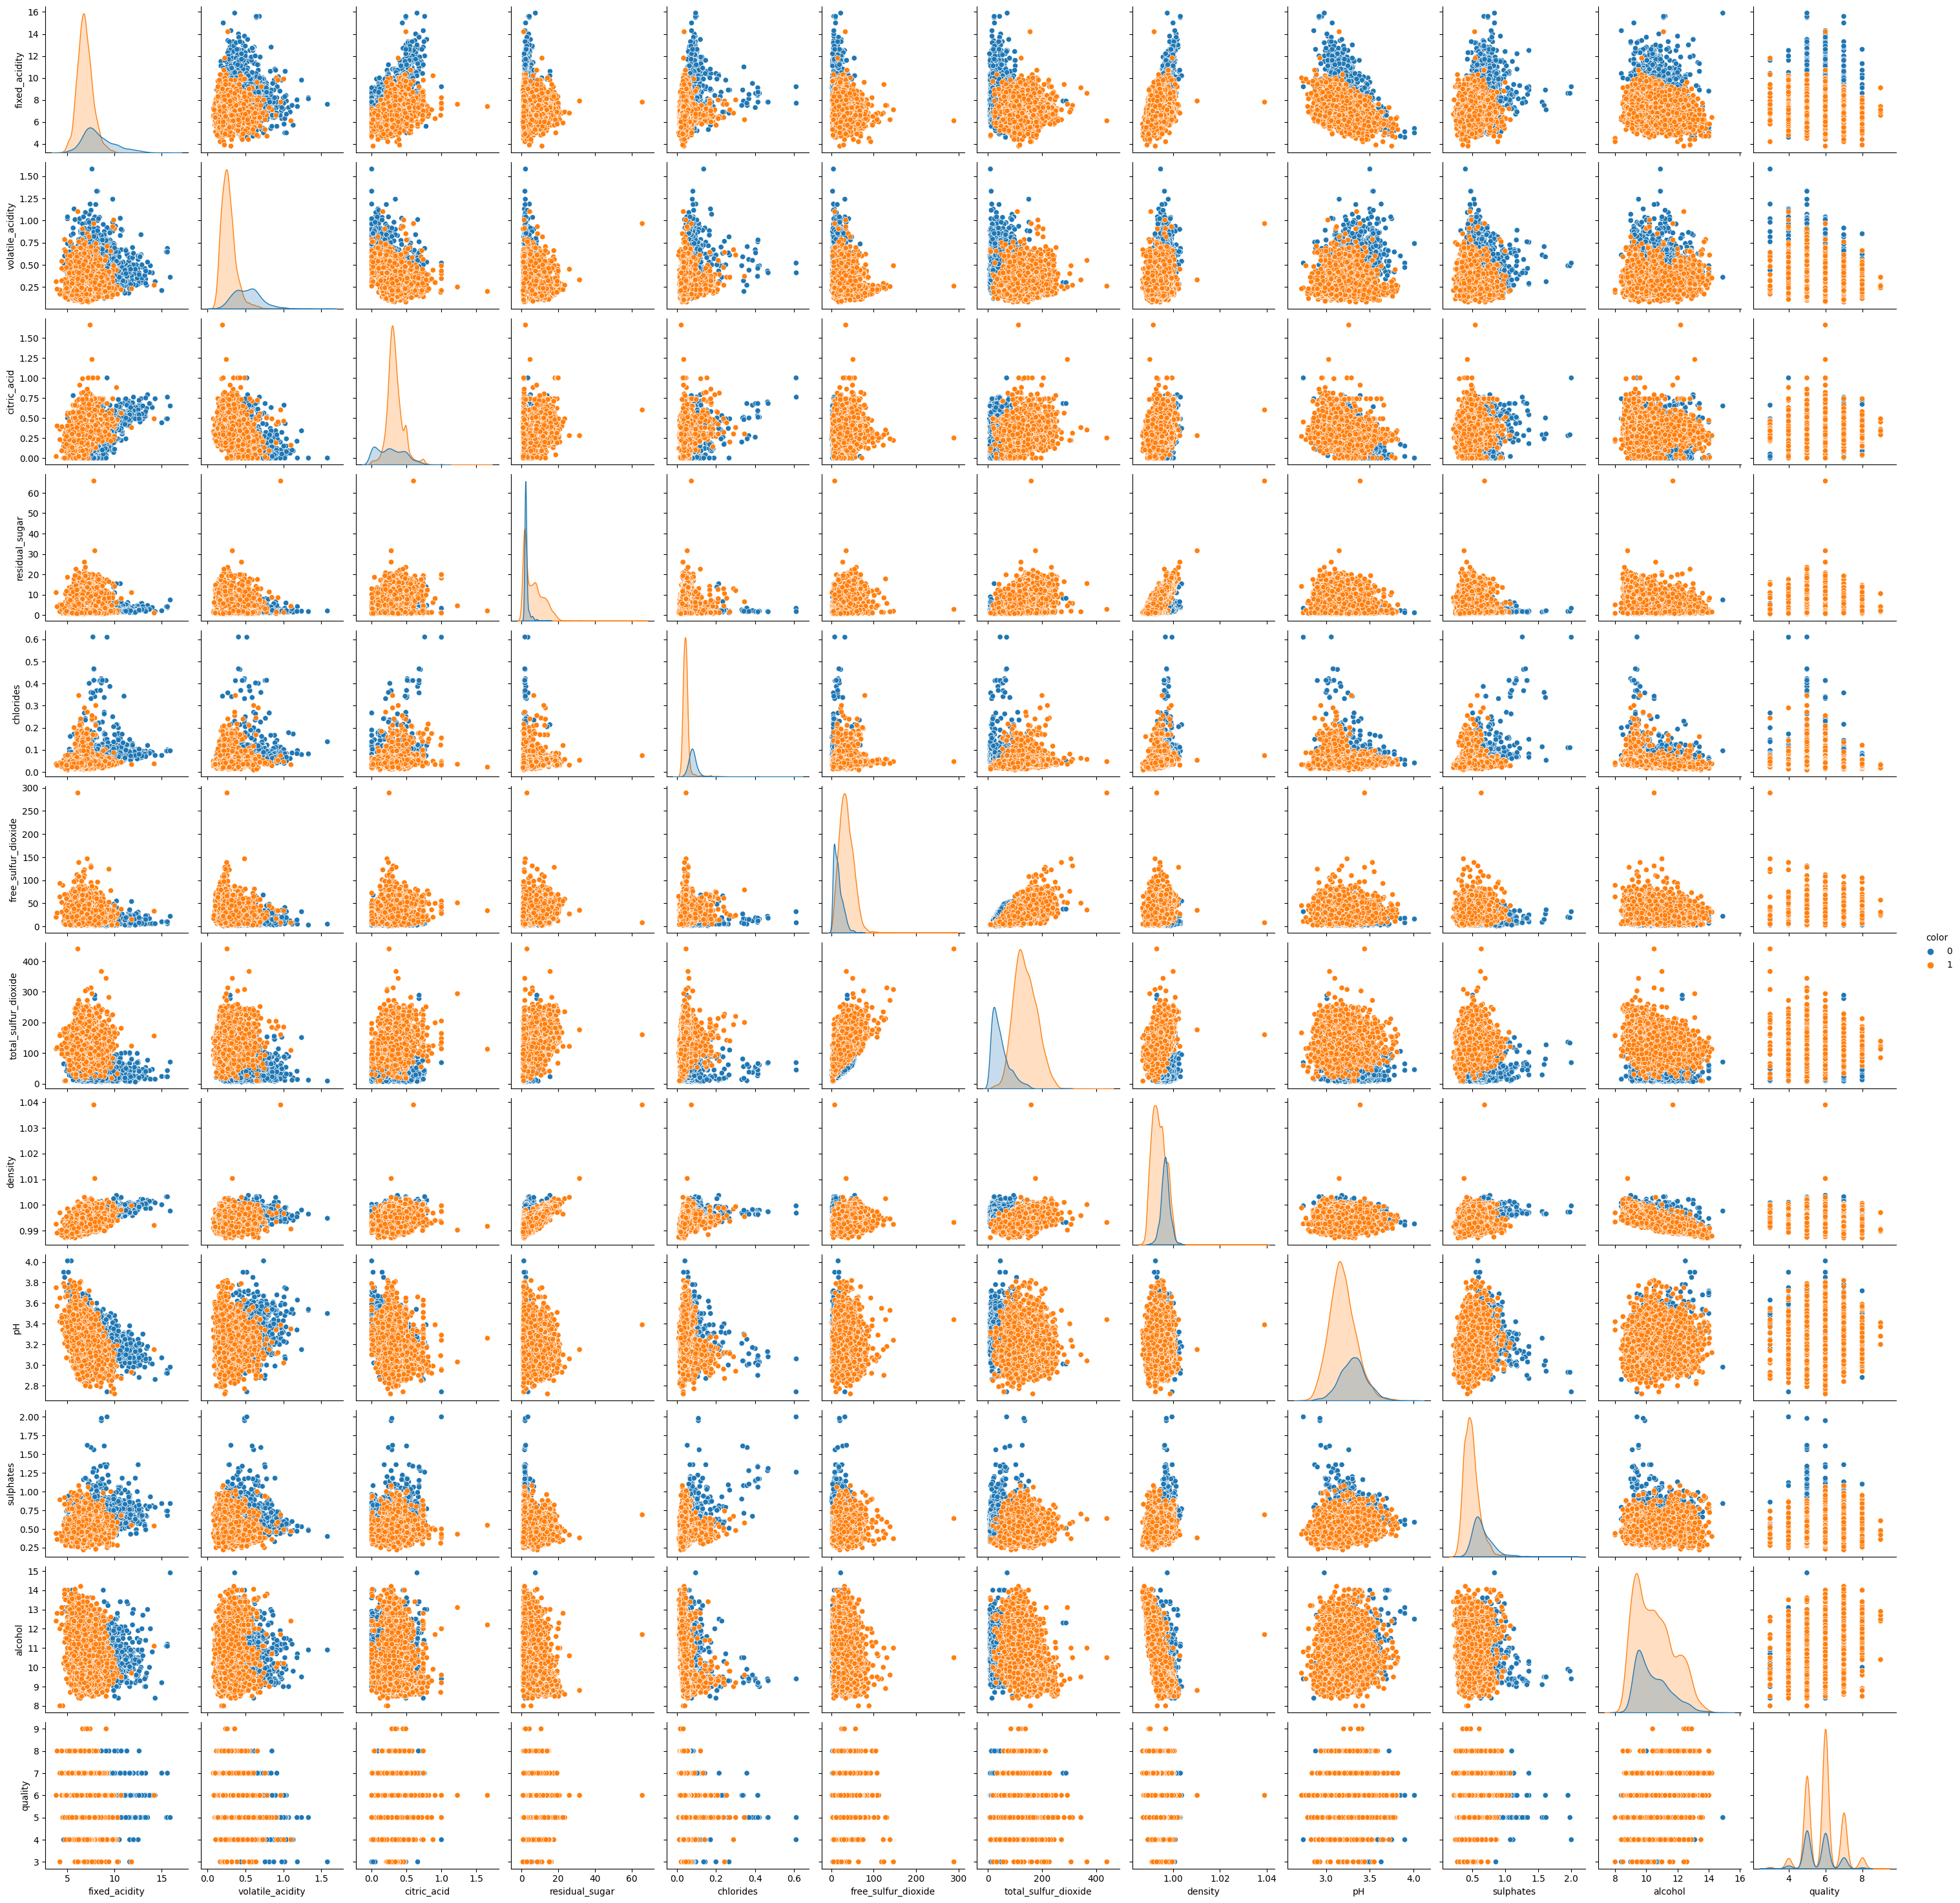

In [7]:
sns.pairplot(data,hue="color")

### Dividing features and target

In [8]:
x = data.drop(columns=['quality','color'])
y = data['color']

In [9]:
x.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


### Splitting train and test data

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)


### Scaling the train and test data

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

In [12]:
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

### Importing DL libraries

In [13]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

### Developing a artificial neural network

In [139]:
model= Sequential()

model.add(Dense(80,activation='relu',input_dim=11))
model.add(Dense(40,activation='relu'))
model.add(Dense(38,activation='relu'))
model.add(Dense(1,activation='sigmoid'))        

In [140]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 80)                960       
                                                                 
 dense_37 (Dense)            (None, 40)                3240      
                                                                 
 dense_38 (Dense)            (None, 38)                1558      
                                                                 
 dense_39 (Dense)            (None, 1)                 39        
                                                                 
Total params: 5,797
Trainable params: 5,797
Non-trainable params: 0
_________________________________________________________________


### Training the model with train data

In [141]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [142]:
history = model.fit(x_train_scaled,y_train,epochs=50,validation_split=0.2)

Epoch 1/50
130/130 [==============================] - 2s 6ms/step - loss: 0.1564 - accuracy: 0.9670 - val_loss: 0.0372 - val_accuracy: 0.9933
Epoch 2/50
130/130 [==============================] - 1s 9ms/step - loss: 0.0252 - accuracy: 0.9949 - val_loss: 0.0374 - val_accuracy: 0.9913
Epoch 3/50
130/130 [==============================] - 0s 3ms/step - loss: 0.0204 - accuracy: 0.9962 - val_loss: 0.0349 - val_accuracy: 0.9913
Epoch 4/50
130/130 [==============================] - 0s 4ms/step - loss: 0.0168 - accuracy: 0.9971 - val_loss: 0.0371 - val_accuracy: 0.9904
Epoch 5/50
130/130 [==============================] - 0s 4ms/step - loss: 0.0157 - accuracy: 0.9966 - val_loss: 0.0287 - val_accuracy: 0.9942
Epoch 6/50
130/130 [==============================] - 0s 3ms/step - loss: 0.0135 - accuracy: 0.9974 - val_loss: 0.0253 - val_accuracy: 0.9952
Epoch 7/50
130/130 [==============================] - 0s 3ms/step - loss: 0.0114 - accuracy: 0.9978 - val_loss: 0.0325 - val_accuracy: 0.9942
Epoch 

In [143]:
log_y = model.predict(x_test_scaled)

41/41 [==============================] - 0s 2ms/step


In [144]:
log_y

array([[1.0000000e+00],
       [9.9999994e-01],
       [1.0000000e+00],
       ...,
       [1.2469779e-21],
       [4.3684999e-13],
       [1.0000000e+00]], dtype=float32)

In [145]:
y_pred = np.where(log_y>0.5,1,0)

In [146]:
y_pred

array([[1],
       [1],
       [1],
       ...,
       [0],
       [0],
       [1]])

### Calculating the accuracy

In [147]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9930769230769231

### Plotting the validation accuracy and validation laws

In [148]:
import matplotlib.pyplot as plt 

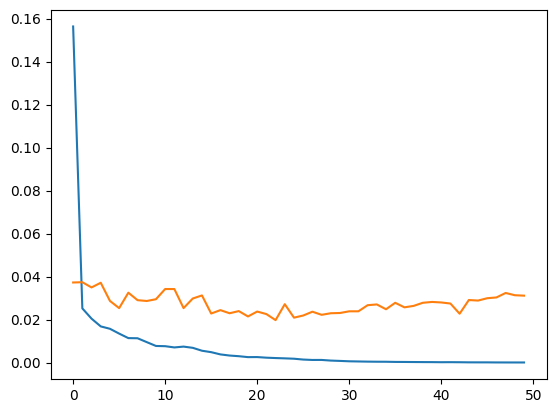

In [149]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [150]:
def tell_key(v):
    k = list(c.values()).index(v)
    return list(c.keys())[k]

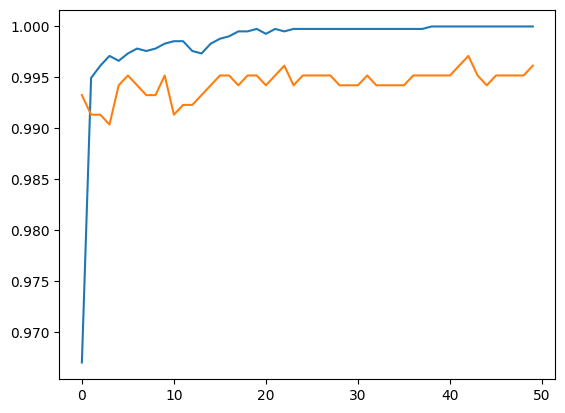

In [151]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [152]:
number = model.predict(x_test_scaled[[0]])

1/1 [==============================] - 0s 38ms/step


In [153]:
number = np.where(number>0.5,1,0)

In [154]:
number

array([[1]])

In [155]:
y_test[0]

1